# Preprocessing Daily Rainfall Data in DAM Downstream 

### 0. Download Data from HydroShare

In [1]:
from hsclient import HydroShare
import os, shutil

hs = HydroShare()
hs.sign_in()

In [2]:
# Get the resource you want to download using its identifier
res_identifier = 'd7618fb6d1f14d04be6a9a7fd5c5396d'
res = hs.resource(res_identifier)

# Download the resource as a zipped Bagit file
# Pass in a file path if you want to download to a particular location
res.download()

'd7618fb6d1f14d04be6a9a7fd5c5396d.zip'

In [3]:
cwd_path = os.getcwd()
hs_path = os.path.join(cwd_path, res_identifier + ".zip")
shutil.unpack_archive(hs_path, extract_dir=cwd_path)
file_folder = os.path.join(cwd_path, res_identifier, "data/contents")
folder_name = os.listdir(file_folder)[0].split(".")[0]
raw_data = os.path.join(cwd_path, folder_name, "raw_data")
if not os.path.exists(raw_data):
    os.mkdir(os.path.join(cwd_path, folder_name))
    os.mkdir(raw_data)                  
shutil.unpack_archive(os.path.join(file_folder, os.listdir(file_folder)[0]), extract_dir=raw_data)
os.remove(hs_path)
shutil.rmtree(os.path.join(cwd_path, res_identifier))

### 1. Import Required Python Libraries

In [4]:
import pandas as pd
import datetime
from datetime import timedelta
from pylab import rcParams
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

### 2. Read daily Rainfall data in Dam Downstream

<div class="alert alert-success">
Read Daily Rainfall Data that obtained from DAON database system in K-water </div>

In [5]:
obs_folder_name = "YD_DAM_Downstream"
raw_data_folder = os.path.join(os.getcwd(), obs_folder_name, "raw_data")
os.listdir(raw_data_folder)

['MJ_PS_Dam_Operation_Daily.csv',
 '1_YD_DAM_Downstream_Rainfall_Observation_Periods.csv',
 '2_YD_DAM_Downstream_WaterLevel_Observation.xlsx',
 'YD_DAM_Downstream_WaterLevel_Daily.csv',
 'YD_DAM_Downstream_WaterLevel_Hourly.csv',
 'YD_DAM_Downstream_Rainfall_Daily.csv',
 'YD_DAM_Downstream_Rainfall_Hourly.csv',
 'MJ_PS_Dam_Operation_Hourly.csv']

In [6]:
all_obs_df = pd.read_csv(os.path.join(raw_data_folder, "YD_DAM_Downstream_Rainfall_Daily.csv"))
all_obs_df.head()

,OBSYMD,RFOBSCD,RF
0,19970317,3007470,0.0
1,19970317,3008440,0.0
2,19970317,3003450,1.0
3,19970317,3013440,NaN
4,19970317,3012425,NaN


<div class="alert alert-success">
Total Rainfall stations in Dam Upstream </div>

In [7]:
all_obs_code = all_obs_df["RFOBSCD"].unique()
all_obs_code

array([3007470, 3008440, 3003450, 3013440, 3012425, 3011430, 3008430,
       3005440, 3004440, 3013420, 3005430, 3008460, 3004430, 3009410,
       3008450, 3003430, 3009420, 3007435, 8000636, 8000648, 8000821,
       9000029, 8000647, 8000701, 8000834, 3003452, 3008420, 1004430,
       8000238, 3007481, 3007440, 3005454, 3003420, 8000625, 8000641,
       9000016, 3007479, 3007460, 3001442, 9000121, 8000226, 8000605,
       2010434, 8000757, 1004410, 3007450, 9000079, 3007430, 9000133,
       1004434, 3007425, 3003454, 9000027, 8000734, 8000758, 2008430,
       3001410, 3007455, 9000018, 9000017, 3007483, 3007487, 3013430,
       3007475, 9000019, 3007477, 3005450, 9000117, 3003431, 8000659,
       8000809, 8000642, 8000888, 8000135, 8000133, 8000735, 8000604,
       8000314, 8000626, 8000643, 8007311, 8004153, 8003184, 8004108,
       8007300, 8003145, 8003914, 8004102, 8004899, 8003918, 8005900,
       8004180, 8005910, 8007021, 8003897, 8007299, 8005200, 8005904,
       8004103, 8004

### 3. Set Rainfall stations considering data observation periods

<div class="alert alert-success">
In Dam Upstream Rainfall stations, we selected the stations with an more than 24 years observation periods. </div>

In [8]:
obs_periods_df = pd.read_csv(os.path.join(raw_data_folder, "1_YD_DAM_Downstream_Rainfall_Observation_Periods.csv"))
obs_periods_df.head()

,No,RFOBSCD,MAX(OBSDH),MIN(OBSDH),END_YEAR,START_YEAR,PERIODS(YEARS)
0,1,1004410,2024011620,2004022123,2024,2004,20
1,2,1004430,2024011620,2008030420,2024,2008,16
2,3,1004434,2024011620,2016062919,2024,2016,8
3,4,2008430,2024011620,2003090824,2024,2003,21
4,5,2010434,2024011620,2011121024,2024,2011,13


In [10]:
code_select = obs_periods_df[obs_periods_df['PERIODS(YEARS)'] >= 24]
code_select

,No,RFOBSCD,MAX(OBSDH),MIN(OBSDH),END_YEAR,START_YEAR,PERIODS(YEARS)
8,9,3003430,2024011620,1979070101,2024,1979,45
9,10,3003431,2024011620,1999070201,2024,1999,25
10,11,3003450,2024011620,1989011901,2024,1989,35
13,14,3004430,2024011620,1979070101,2024,1979,45
14,15,3004440,2024011620,1979070101,2024,1979,45
15,16,3005430,2024011620,1979070101,2024,1979,45
16,17,3005440,2024011620,1979071401,2024,1979,45
26,27,3007470,2024011620,1992010101,2024,1992,32
27,28,3007475,2024011620,1991010101,2024,1991,33
34,35,3008430,2024011620,1979071401,2024,1979,45


In [11]:
obs_code = code_select.RFOBSCD.values
obs_code

array([3003430, 3003431, 3003450, 3004430, 3004440, 3005430, 3005440,
       3007470, 3007475, 3008430, 3008440, 3008450, 3008460, 3009410,
       3009420, 3011430, 3012425, 3013420, 3013440])

### 4. Set Date Data Format and Observation Periods 

<div class="alert alert-success">
Change "date data format" from string to Pandas datetime format </div>

In [12]:
all_obs_df["date"] = pd.to_datetime(all_obs_df["OBSYMD"], format='%Y%m%d')
all_obs_df.head()

,OBSYMD,RFOBSCD,RF,date
0,19970317,3007470,0.0,1997-03-17
1,19970317,3008440,0.0,1997-03-17
2,19970317,3003450,1.0,1997-03-17
3,19970317,3013440,NaN,1997-03-17
4,19970317,3012425,NaN,1997-03-17


<div class="alert alert-success">
Check Observation Periods to create Date Dataframe </div>

In [13]:
all_obs_df["date"].min(), all_obs_df["date"].max()

(Timestamp('1979-07-14 00:00:00'), Timestamp('2024-01-16 00:00:00'))

<div class="alert alert-success">
Create Total Date Periods using Max and Min date above </div>

In [14]:
total_date_df = pd.DataFrame(
    {'date': pd.date_range(start=all_obs_df["date"].min(), end=all_obs_df["date"].max(), freq='1D'),
    }
)
print(len(total_date_df))
total_rf_df = total_date_df
total_date_df.head()

16258


,date
0,1979-07-14
1,1979-07-15
2,1979-07-16
3,1979-07-17
4,1979-07-18


### 5. Preprocessing Daily Data in Dam Upstream

<div class="alert alert-success">
<b> Create Daily Dataframe using station codes as columns </div>

In [15]:
for code in obs_code:
    code_data = all_obs_df[all_obs_df['RFOBSCD'] == code]
    total_df = pd.merge(total_rf_df, code_data, on="date", how="left")
    total_rf_df[str(code)+"_drf"] = total_df["RF"].values
    
total_rf_df_f = total_rf_df.set_index("date")
total_rf_df_f.head()

,3003430_drf,3003431_drf,3003450_drf,3004430_drf,3004440_drf,3005430_drf,3005440_drf,3007470_drf,3007475_drf,3008430_drf,3008440_drf,3008450_drf,3008460_drf,3009410_drf,3009420_drf,3011430_drf,3012425_drf,3013420_drf,3013440_drf
date,,,,,,,,,,,,,,,,,,,
1979-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-15,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-16,8.0,NaN,NaN,NaN,2.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-17,13.0,NaN,NaN,NaN,7.0,10.0,13.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-18,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-success">
<b> Select important stations </div>

In [16]:
selected_rf_df_f = total_rf_df_f.loc["2000-10-01":"2023-09-30"]
selected_rf_df_f.head()

,3003430_drf,3003431_drf,3003450_drf,3004430_drf,3004440_drf,3005430_drf,3005440_drf,3007470_drf,3007475_drf,3008430_drf,3008440_drf,3008450_drf,3008460_drf,3009410_drf,3009420_drf,3011430_drf,3012425_drf,3013420_drf,3013440_drf
date,,,,,,,,,,,,,,,,,,,
2000-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-02,9.0,5.0,9.0,7.0,7.0,8.0,8.0,4.0,6.0,4.0,8.0,8.0,4.0,0.0,3.0,5.0,4.0,8.0,9.0
2000-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
2000-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-success">
Check Missing Data in stations : Sum of number of missing data is printed below. </div>

In [17]:
print(len(selected_rf_df_f[selected_rf_df_f.isna().any(axis=1)]))

440


<div class="alert alert-success">
Plotting Missing data </div>

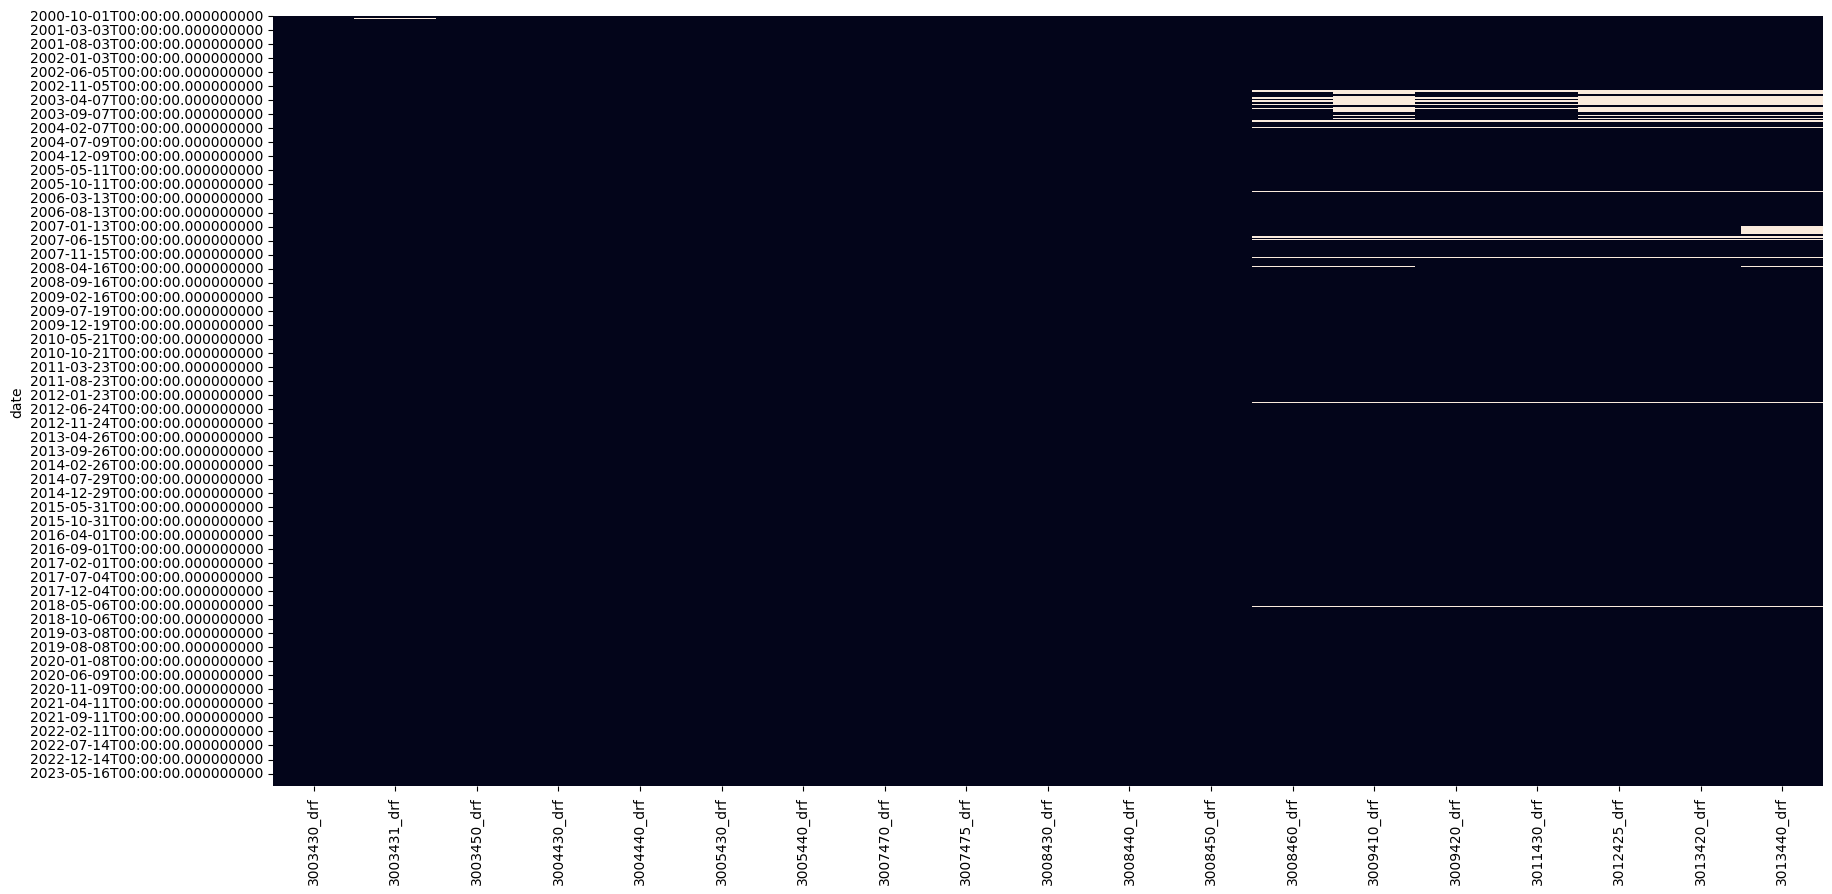

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_rf_df_f.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_dam_downstream_missing_daily.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Plotting Water Level Plot in selected stations </div>

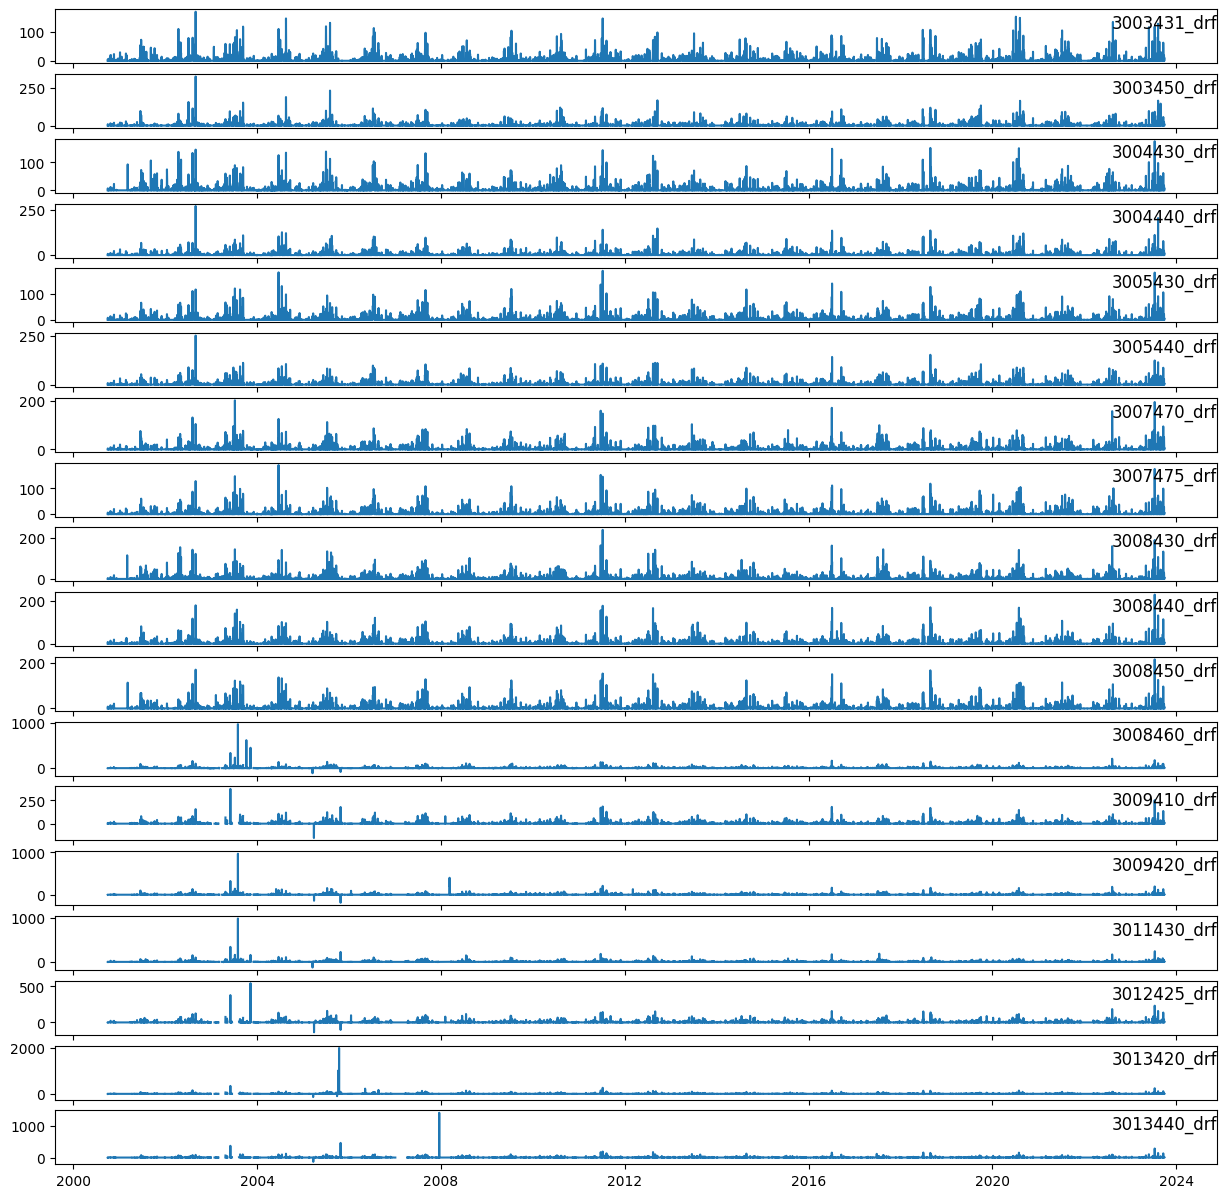

In [20]:
rcParams['figure.figsize'] = 15, 15
values = selected_rf_df_f.values
groups = [*range(1,len(selected_rf_df_f.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_rf_df_f.index,  values[:, group])
    plt.title(selected_rf_df_f.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_dam_downstream_ts_daily.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Interpolating missing data using Pandas library </div>

In [21]:
selected_rf_df_f_revised = selected_rf_df_f
col_name = list(selected_rf_df_f_revised)
selected_rf_df_f_revised[col_name] = selected_rf_df_f_revised[col_name].interpolate(method="pad")
selected_rf_df_f_revised[selected_rf_df_f_revised.isna().any(axis=1)]

,3003430_drf,3003431_drf,3003450_drf,3004430_drf,3004440_drf,3005430_drf,3005440_drf,3007470_drf,3007475_drf,3008430_drf,3008440_drf,3008450_drf,3008460_drf,3009410_drf,3009420_drf,3011430_drf,3012425_drf,3013420_drf,3013440_drf
date,,,,,,,,,,,,,,,,,,,


<div class="alert alert-success">
Check missing data </div>

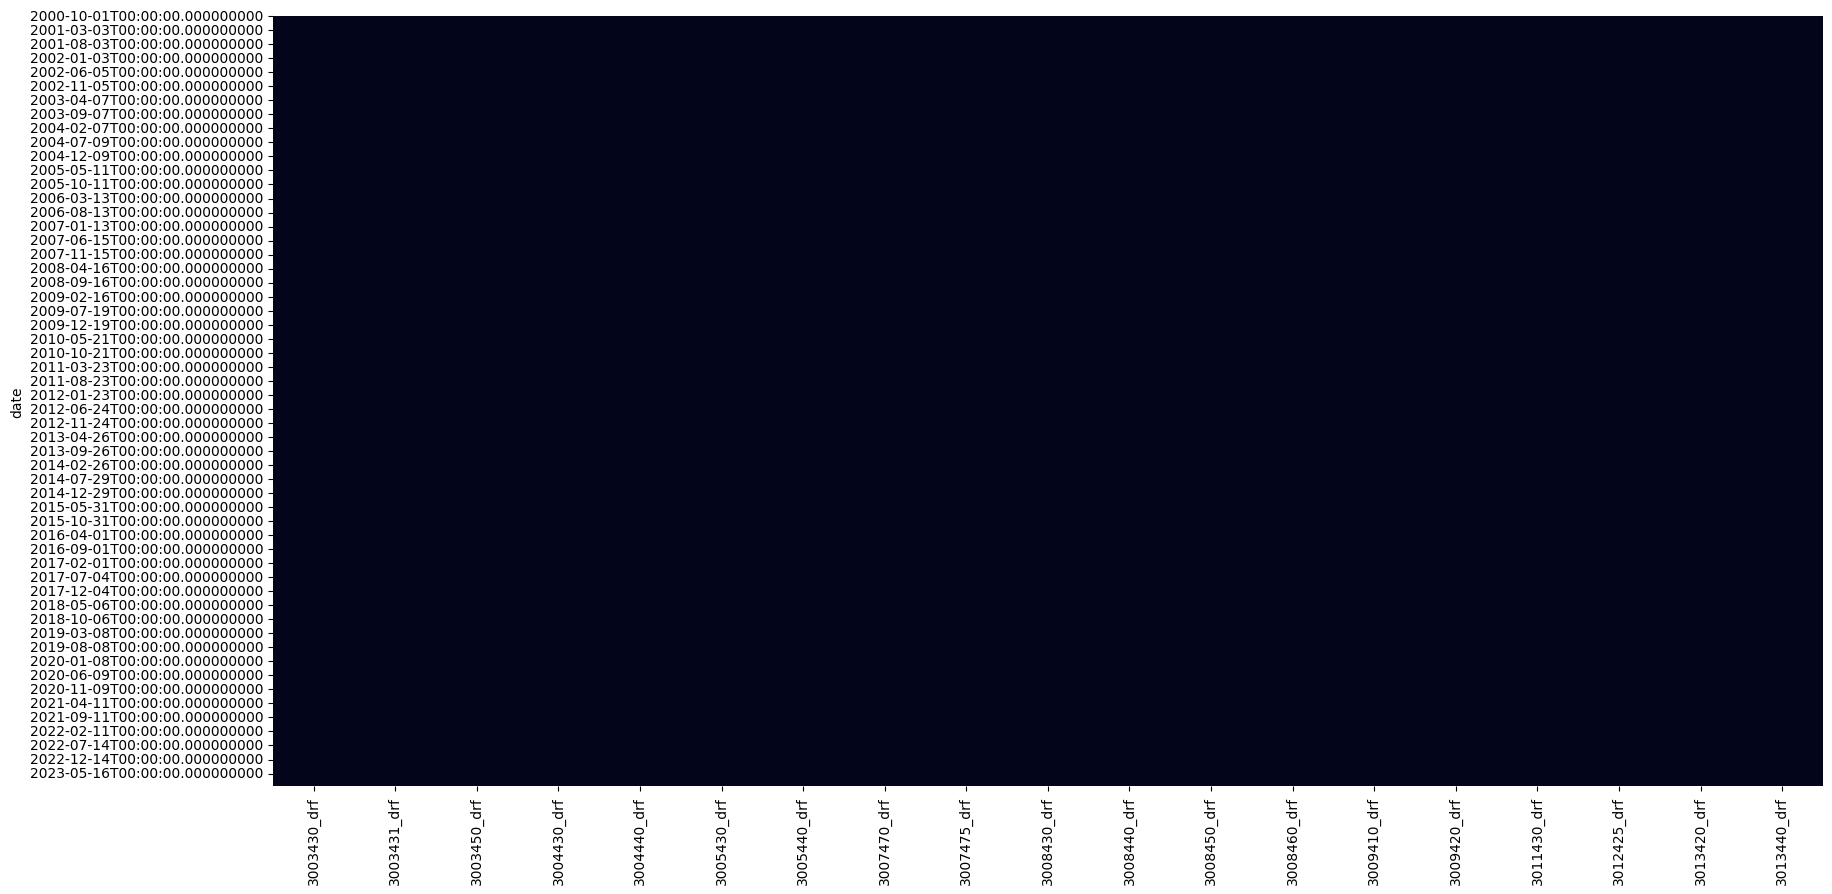

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_rf_df_f_revised.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_downstream_missing_daily_revised.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Plotting Rainfall (that has no missing data) in selected stations </div>

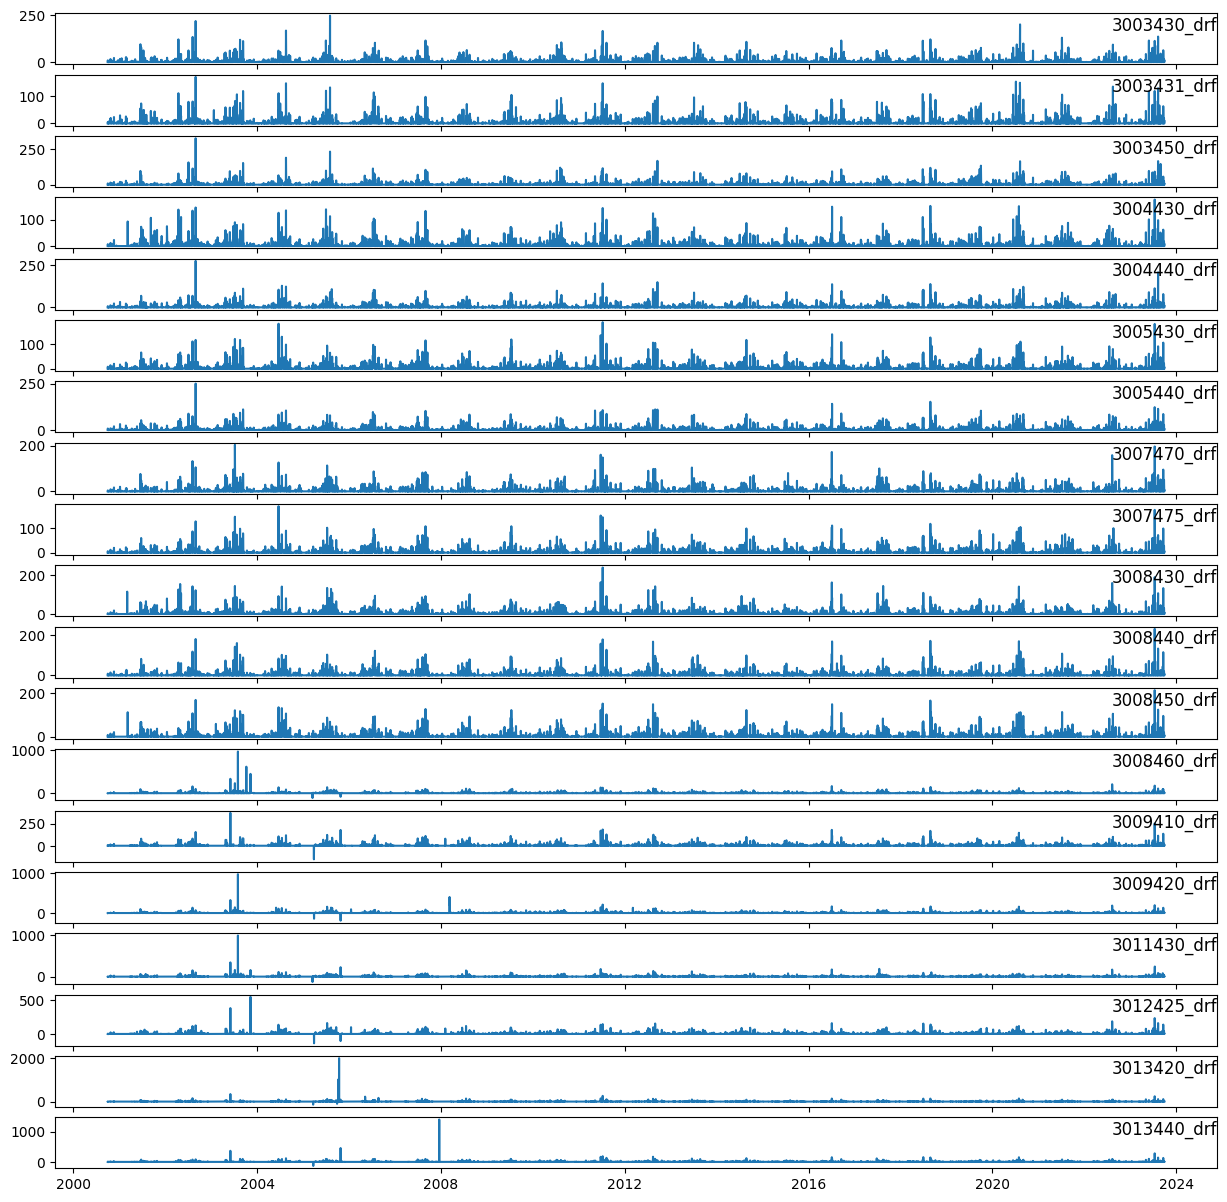

In [23]:
rcParams['figure.figsize'] = 15, 15
values = selected_rf_df_f_revised.values
groups = [*range(0,len(selected_rf_df_f_revised.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_rf_df_f_revised.index,  values[:, group])
    plt.title(selected_rf_df_f_revised.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_dam_downstream_ts_daily_revised.png", bbox_inches='tight')
plt.show()

### 6. Save Daily Rainfall Data as CSV format

In [24]:
selected_rf_df_f_revised.to_csv(os.getcwd() + "/" + obs_folder_name + "/YD_Dam_Downstream_Rainfall_Daily_f.csv")

### 7. Creating Model Input using observation data